In [6]:
# imports
from sklearn.naive_bayes import BernoulliNB
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", "../functions.py")
functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(functions)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

In [7]:
# get data
X, y = functions.get_data()
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [8]:
# Create BernoulliNB classifier
bnb = BernoulliNB()
# Fit the classifier to the data
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [9]:
# predict test values
y_pred_basic = bnb.predict(X_test)

In [10]:
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
"F1 score is = {0}".format(f1_basic)

'F1 score is = 0.13706102966246167'

In [11]:
# write result to file
f = open("../results/files/bnb_results.txt", "w+")
f.write("Basic BNB: F1 score = {0} \n".format(f1_basic))
f.close()

In [12]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_basic, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_basic.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,0.0,-0.394667,-1.564141,0.056410,-0.274925,1.061754,0.527710,0.501141,0.417436,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
1,0.0,0.0,-0.397812,0.639329,-0.365119,-0.180083,-0.599878,-1.221986,-0.084901,0.189295,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
2,0.0,0.0,-0.399256,0.639329,1.039979,-0.889907,-0.876816,-1.513202,-1.196877,0.508692,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
3,0.0,0.0,-0.394479,-1.564141,0.688704,0.259021,-1.707632,-0.487423,-0.911370,0.828089,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
4,0.0,0.0,-0.384398,-1.564141,-0.786648,-0.252631,-0.876816,-0.874324,-0.340355,-0.997037,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
5,0.0,0.0,-0.392940,0.639329,0.267175,-0.806496,-1.153755,-0.208926,-0.280248,-0.221358,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
6,0.0,0.0,2.530987,0.639329,0.407685,0.316158,1.061754,0.577656,0.170553,-0.860152,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
7,0.0,0.0,-0.398426,0.639329,0.372557,-0.153484,1.061754,-1.282201,-0.460568,-1.270806,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
8,0.0,0.0,-0.396693,0.639329,-0.435374,2.256472,-0.599878,0.429481,-0.370408,-0.403871,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
9,1.0,0.0,-0.390100,-1.564141,-1.032540,-0.667309,-0.046001,0.247407,-0.956450,0.736833,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274


In [13]:
# get data
X, y = functions.get_data(type="__removeoutliers")
# split dataset into train and test data
X_train, X_test, y_train, y_test_outliers = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [14]:
# Create BernoulliNB classifier
bnb = BernoulliNB()
# Fit the classifier to the data
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
# predict test values
y_pred_outliers = bnb.predict(X_test)

In [16]:
# calculate F1 score
f1_outliers = f1_score(y_test_outliers, y_pred_outliers)
"F1 score is = {0}".format(f1_outliers)

'F1 score is = 0.13550135501355012'

In [17]:
# write result to file
f = open("../results/files/bnb_results.txt", "a")
f.write("Basic BNB without outliers: F1 score = {0} \n".format(f1_outliers))
f.close()

In [18]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_outliers, columns=["y_pred"])

result['y_test'] = y_test_outliers["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_basic_removed_outliers.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,1.0,-0.394113,-1.607808,-0.567288,0.073933,1.072465,-1.128872,0.360483,-1.198510,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
1,0.0,0.0,-0.382631,0.621965,-0.531438,0.978727,1.072465,0.688797,-0.410890,-0.013890,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,3.793272,-0.011193,-0.051662,-0.033596,-0.032648
2,0.0,1.0,-0.396374,0.621965,0.185566,-0.206339,0.795289,-0.309064,0.730742,0.487295,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
3,0.0,1.0,-0.392333,0.621965,0.221416,-0.671096,1.072465,-1.151383,1.471260,1.170729,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
4,0.0,0.0,-0.396821,0.621965,0.400667,-0.033980,-1.699297,-0.326412,0.838734,-0.879574,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
5,0.0,0.0,-0.396350,0.621965,1.010121,-0.631371,-1.144945,-1.405344,0.237064,0.669544,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
6,0.0,0.0,-0.396922,0.621965,0.723319,-0.948417,-1.422121,-0.376552,-0.457172,-0.105015,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
7,0.0,0.0,-0.388737,0.621965,0.293117,-0.541701,1.072465,0.171164,-0.457172,1.352979,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
8,0.0,0.0,-0.392260,-1.607808,0.759169,-0.228612,1.072465,1.214596,-0.565164,0.669544,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
9,0.0,1.0,-0.393592,-1.607808,-1.320142,-0.057621,1.072465,1.456709,-0.997133,-1.289635,...,-0.11134,-0.183300,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648


In [19]:
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [20]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
# predict test values
y_pred_PCA = bnb.predict(X_test)

In [22]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.8794612794612795'

In [23]:
# write result to file
f = open("../results/files/bnb_results.txt", "a")
f.write("Basic BNB with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [24]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_PCA_features.csv")

result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.394669,-0.028743,-0.257270,-0.289530,-0.758346,-0.208084,0.397865,-0.024111,...,-0.283244,0.153906,0.261108,0.130281,0.059156,-0.031446,-0.019454,-0.066093,0.051100,-0.000903
1,0.0,0.0,-0.397813,-0.057037,-0.172509,0.052432,1.406923,0.441850,0.195906,-0.153543,...,-0.153688,0.207358,-0.019073,-0.075415,-0.092979,-0.109952,0.050968,0.022644,0.024899,0.061057
2,0.0,0.0,-0.399265,-0.097745,-0.894736,0.375965,1.160763,-0.992941,0.327713,-0.282320,...,-0.280774,0.195533,-0.176645,-0.258875,-0.014457,-0.027887,-0.074415,-0.124431,-0.043032,0.000129
3,0.0,0.0,-0.394477,-0.021281,0.241131,0.657245,0.580866,-0.732392,0.778615,0.034851,...,-0.307974,0.096512,0.120761,-0.217813,0.008497,0.019301,-0.054198,-0.201127,-0.005035,0.069333
4,0.0,0.0,-0.384401,-0.007250,-0.273162,0.671431,0.703325,0.887603,-0.945880,-0.135938,...,-0.405564,-1.877944,-2.264691,-1.344004,-0.577811,-0.660793,-0.241396,-0.074608,-0.119823,0.119431
5,0.0,0.0,-0.392948,-0.093275,-0.806927,0.232582,-0.382666,-0.322584,-0.304176,-0.165201,...,-0.260915,0.147140,-0.336262,-0.266400,-0.052825,-0.022478,-0.075731,-0.015372,-0.043908,-0.014156
6,0.0,0.0,2.530990,-0.067730,0.259964,0.574834,-0.744059,-0.112967,-0.889443,-1.763298,...,-0.141879,0.084251,0.109525,0.071627,0.049238,-0.065990,-0.055590,0.057247,0.016916,-0.029343
7,0.0,0.0,-0.398427,-0.107544,-0.168499,0.694724,1.280692,-0.214541,-1.334775,-0.106168,...,-0.365236,-1.889421,-2.413846,-1.317003,-0.558068,-0.636538,-0.270063,-0.033699,-0.164098,0.023064
8,0.0,0.0,-0.396667,0.023979,2.279309,-0.302925,1.166196,0.469487,-0.198000,0.540528,...,-0.089484,-0.064671,0.068746,-0.062748,-0.126551,-0.031899,0.105481,0.069157,0.019873,0.096250
9,0.0,0.0,-0.390107,-0.030279,-0.651934,-0.254285,-0.693738,0.892747,0.801369,-0.158505,...,3.242996,0.133978,0.228708,0.040401,-0.052315,-0.057815,-0.021426,-0.057958,-0.089168,-0.030953


In [25]:
# get data
X, y = functions.get_data(type="__FTs")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [26]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
# predict test values
y_pred_FT = bnb.predict(X_test)

In [28]:
# calculate F1 score
f1_FT = f1_score(y_test, y_pred_FT)
"F1 score is = {0}".format(f1_FT)

'F1 score is = 0.3770600965540203'

In [29]:
# write result to file
f = open("../results/files/bnb_results.txt", "a")
f.write("Basic BNB with FT features: F1 score = {0} \n".format(f1_FT))
f.close()

In [30]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_FT, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_FT_features.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Current Loan Amount + Term,Current Loan Amount / Purpose_Other,Current Loan Amount / Purpose_Medical Bills,Current Loan Amount / Purpose_Educational Expenses,Current Loan Amount / Purpose_small_business,Current Loan Amount / Purpose_renewable_energy,Current Loan Amount / Purpose_wedding,...,1 % Current Loan Amount,1 / Current Loan Amount,0 - Current Loan Amount,Current Loan Amount / Purpose_major_purchase,Credit Score + Current Loan Amount,Current Loan Amount / Purpose_moving,Current Loan Amount / Purpose_Take a Trip,Current Loan Amount / Home Ownership_HaveMortgage,Current Loan Amount / Purpose_Buy House,Current Loan Amount / Purpose_Buy a Car
0,1.0,0.0,-0.394667,-1.335361,0.400739,0.397562,0.394685,0.395503,0.394714,0.394797,...,-0.391666,-0.397123,0.394667,0.395148,-0.225018,0.394803,0.395778,0.395048,0.396305,0.396804
1,1.0,0.0,-0.397812,0.164647,0.403938,0.400724,0.397833,0.398652,0.397860,0.397945,...,-0.414946,-0.377102,0.397812,0.398299,-0.507524,0.397952,0.398934,0.398198,0.399460,0.399970
2,1.0,0.0,-0.399256,0.163663,0.405406,0.402175,0.399277,0.400097,0.399303,0.399389,...,-0.425628,-0.368021,0.399256,0.399745,0.426228,0.399397,0.400382,0.399644,0.400908,0.401422
3,1.0,0.0,-0.394479,-1.335233,0.400549,0.397374,0.394497,0.395316,0.394527,0.394610,...,-0.390280,-0.398325,0.394479,0.394960,0.195727,0.394616,0.395590,0.394861,0.396117,0.396616
4,1.0,0.0,-0.384398,-1.328361,0.390297,0.387238,0.384409,0.385224,0.384446,0.384522,...,-0.315669,-0.464759,0.384398,0.384860,-0.779014,0.384524,0.385476,0.384765,0.386003,0.386470
5,1.0,0.0,-0.392940,0.167968,0.398983,0.395826,0.392957,0.393775,0.392987,0.393069,...,-0.378886,-0.408250,0.392940,0.393418,-0.083662,0.393075,0.394046,0.393319,0.394572,0.395066
6,0.0,0.0,2.530987,2.161271,-2.574281,-2.543845,-2.533190,-2.533363,-2.530965,-2.532860,...,2.529225,2.529647,-2.530987,-2.536025,1.954890,-2.533966,-2.539360,-2.534688,-2.538818,-2.547566
7,1.0,0.0,-0.398426,0.164228,0.404562,0.401342,0.398447,0.399267,0.398474,0.398560,...,-0.419491,-0.373230,0.398426,0.398915,-0.017209,0.398567,0.399550,0.398813,0.400077,0.400588
8,1.0,0.0,-0.396693,0.165410,0.402799,0.399599,0.396712,0.397531,0.396740,0.396825,...,-0.406658,-0.384193,0.396693,0.397177,-0.553515,0.396831,0.397811,0.397077,0.398337,0.398843
9,1.0,0.0,-0.390100,-1.332247,0.396095,0.392970,0.390114,0.390931,0.390147,0.390227,...,-0.357866,-0.426765,0.390100,0.390572,-0.946381,0.390232,0.391196,0.390475,0.391723,0.392208


In [31]:
# get data
X, y = functions.get_data(type="__polynomial")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [32]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [33]:
# predict test values
y_pred_poly = bnb.predict(X_test)

In [34]:
# calculate F1 score
f1_poly = f1_score(y_test, y_pred_poly)
"F1 score is = {0}".format(f1_poly)

'F1 score is = 0.3647163647163647'

In [35]:
# write result to file
f = open("../results/files/bnb_results.txt", "a")
f.write("Basic BNB with polynomial features: F1 score = {0} \n".format(f1_poly))
f.close()

In [36]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_poly, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_polynomial_features.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Income,Credit Ration per Year,Home Ownership_Home Mortgage,Home Ownership_Rent,...,Term^2,Term Credit Score,Credit Score^2,Annual Income Credit Ration per Year,Monthly Debt Credit Ration per Year,Current Credit Balance Credit Ration per Year,Monthly Income Credit Ration per Year,Credit Ration per Year^2,Home Ownership_Home Mortgage^2,Home Ownership_Rent^2
0,0.0,0.0,-0.394667,-1.564141,0.056410,-0.274925,-0.386269,-0.344986,0.966542,-0.803981,...,1.564141,-0.502245,-0.504913,0.261444,-0.093949,-0.012234,0.317088,-0.202003,-0.966542,-0.803981
1,0.0,0.0,-0.397812,0.639329,-0.365119,-0.180083,0.010331,-0.348006,0.966542,-0.803981,...,-0.639329,-0.630098,-0.438999,0.221231,0.594119,0.132843,0.136567,-0.201523,-0.966542,-0.803981
2,1.0,0.0,-0.399256,0.639329,1.039979,-0.889907,-0.709167,-0.344928,-1.034616,1.243810,...,-0.639329,0.160916,0.041310,0.526542,0.703663,0.426673,0.463975,-0.202012,1.034616,1.243810
3,0.0,0.0,-0.394479,-1.564141,0.688704,0.259021,0.362284,-0.347261,-1.034616,1.243810,...,1.564141,-1.373106,-0.266273,0.030486,0.304082,0.332632,-0.024642,-0.201642,1.034616,1.243810
4,1.0,0.0,-0.384398,-1.564141,-0.786648,-0.252631,-0.126609,-0.336643,0.966542,-0.803981,...,1.564141,0.658902,-0.193079,0.249197,0.445785,0.427143,0.197532,-0.203307,-0.966542,-0.803981
5,1.0,0.0,-0.392940,0.639329,0.267175,-0.806496,-0.837975,-0.336806,-1.034616,1.243810,...,-0.639329,-0.274142,-0.470368,0.482397,0.192036,0.336506,0.513603,-0.203282,1.034616,1.243810
6,0.0,0.0,2.530987,0.639329,0.407685,0.316158,0.245217,1.338327,0.966542,-0.803981,...,-0.639329,-0.195040,-0.422337,0.671732,0.988206,-0.752861,0.574209,0.181397,-0.966542,-0.803981
7,0.0,0.0,-0.398426,0.639329,0.372557,-0.153484,0.049241,-0.348574,0.966542,-0.803981,...,-0.639329,-0.214816,-0.436219,0.209771,0.618686,0.438846,0.118669,-0.201433,-0.966542,-0.803981
8,0.0,0.0,-0.396693,0.639329,-0.435374,2.256472,2.370594,-0.350960,0.966542,-0.803981,...,-0.639329,-0.669649,-0.410513,-0.846868,-0.058463,-0.526104,-0.956155,-0.201050,-0.966542,-0.803981
9,1.0,0.0,-0.390100,-1.564141,-1.032540,-0.667309,-0.763956,-0.335909,-1.034616,-0.803981,...,1.564141,0.997570,0.033501,0.423058,0.018154,0.080539,0.479814,-0.203420,1.034616,-0.803981


In [37]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


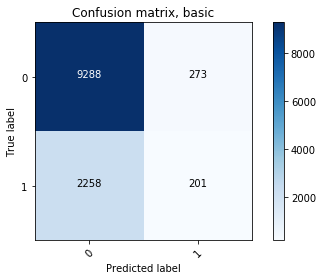

Confusion matrix, without normalization


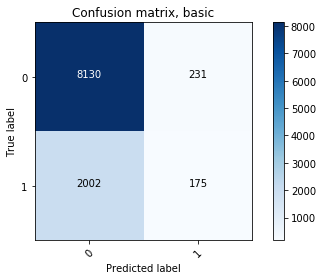

Confusion matrix, without normalization


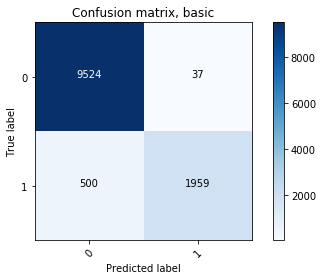

Confusion matrix, without normalization


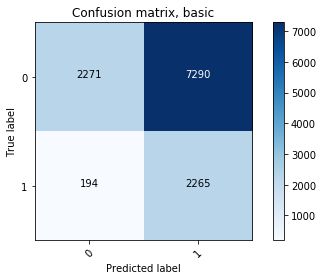

Confusion matrix, without normalization


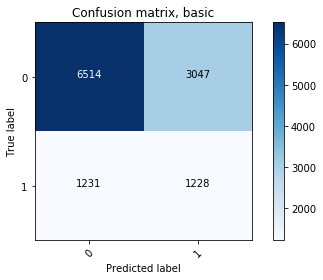

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm_basic = confusion_matrix(y_test, y_pred_basic)
cm_outliers = confusion_matrix(y_test_outliers, y_pred_outliers)
cm_PCA = confusion_matrix(y_test, y_pred_PCA)
cm_FT = confusion_matrix(y_test, y_pred_FT)
cm_poly = confusion_matrix(y_test, y_pred_poly)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basic, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_outliers, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_PCA, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_FT, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_poly, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

In [39]:
# imports 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score,  StratifiedKFold
import numpy as np

In [40]:
# param values
alphas = np.array([0.01,0.02])
gnb_fit_prior = [True, False], 

In [41]:
# creating  grid instance
grid_params_nn = dict(alpha=alphas, fit_prior=gnb_fit_prior)

In [55]:
grid_params_nn = {
  'alpha': np.linspace(0.0, 1.5, 20),
  'fit_prior': [True, False],
}

In [56]:
# creating KNN instance
bnb = BernoulliNB()

In [57]:
# search optimal params using RandomizedSearchCV
neigh_ins = RandomizedSearchCV(bnb, grid_params_nn, cv=10, scoring='f1', n_iter=700, verbose=10, n_jobs=-1)

In [58]:
# load data
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [59]:
# fit search
neigh_ins.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 40 is smaller than n_iter=700. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1835s.) Setting batch_size=2.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.2s
[Paralle

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          fit_params=None, iid='warn', n_iter=700, n_jobs=-1,
          param_distributions={'alpha': array([0.     , 0.07895, 0.15789, 0.23684, 0.31579, 0.39474, 0.47368,
       0.55263, 0.63158, 0.71053, 0.78947, 0.86842, 0.94737, 1.02632,
       1.10526, 1.18421, 1.26316, 1.34211, 1.42105, 1.5    ]), 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [60]:
# get results
best_score = neigh_ins.best_score_

best_estimator = neigh_ins.best_estimator_

best_params = neigh_ins.best_params_

In [61]:
# write results to file
print("Best score: {0}".format(best_score))
print("Best params: {0}".format(best_params))

f = open("../results/files/bnb_tuning_results__PCA.txt", "w+")

f.write("Best score = {0} \n".format(best_score))
f.write("Best params = {0} \n".format(best_params))

f.close()

Best score: 0.8668420877895975
Best params: {'fit_prior': True, 'alpha': 0.9473684210526315}


In [62]:
bnb = BernoulliNB(alpha=0.9473684210526315, binarize=0.0, class_prior=None, fit_prior=True)
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=0.9473684210526315, binarize=0.0, class_prior=None,
      fit_prior=True)

In [63]:
y_pred_PCA = bnb.predict(X_test)

In [64]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.8794612794612795'

In [65]:
f = open("../results/files/bnb_results_final.txt", "w+")
f.write("Basic BNB with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [66]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])
result['y_test'] = y_test["Loan Status"].values
result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
result = pd.concat([result, X_test], axis=1)
result.to_csv("../results/datasets/bnb_prediction_final.csv")
result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.394669,-0.028743,-0.257270,-0.289530,-0.758346,-0.208084,0.397865,-0.024111,...,-0.283244,0.153906,0.261108,0.130281,0.059156,-0.031446,-0.019454,-0.066093,0.051100,-0.000903
1,0.0,0.0,-0.397813,-0.057037,-0.172509,0.052432,1.406923,0.441850,0.195906,-0.153543,...,-0.153688,0.207358,-0.019073,-0.075415,-0.092979,-0.109952,0.050968,0.022644,0.024899,0.061057
2,0.0,0.0,-0.399265,-0.097745,-0.894736,0.375965,1.160763,-0.992941,0.327713,-0.282320,...,-0.280774,0.195533,-0.176645,-0.258875,-0.014457,-0.027887,-0.074415,-0.124431,-0.043032,0.000129
3,0.0,0.0,-0.394477,-0.021281,0.241131,0.657245,0.580866,-0.732392,0.778615,0.034851,...,-0.307974,0.096512,0.120761,-0.217813,0.008497,0.019301,-0.054198,-0.201127,-0.005035,0.069333
4,0.0,0.0,-0.384401,-0.007250,-0.273162,0.671431,0.703325,0.887603,-0.945880,-0.135938,...,-0.405564,-1.877944,-2.264691,-1.344004,-0.577811,-0.660793,-0.241396,-0.074608,-0.119823,0.119431
5,0.0,0.0,-0.392948,-0.093275,-0.806927,0.232582,-0.382666,-0.322584,-0.304176,-0.165201,...,-0.260915,0.147140,-0.336262,-0.266400,-0.052825,-0.022478,-0.075731,-0.015372,-0.043908,-0.014156
6,0.0,0.0,2.530990,-0.067730,0.259964,0.574834,-0.744059,-0.112967,-0.889443,-1.763298,...,-0.141879,0.084251,0.109525,0.071627,0.049238,-0.065990,-0.055590,0.057247,0.016916,-0.029343
7,0.0,0.0,-0.398427,-0.107544,-0.168499,0.694724,1.280692,-0.214541,-1.334775,-0.106168,...,-0.365236,-1.889421,-2.413846,-1.317003,-0.558068,-0.636538,-0.270063,-0.033699,-0.164098,0.023064
8,0.0,0.0,-0.396667,0.023979,2.279309,-0.302925,1.166196,0.469487,-0.198000,0.540528,...,-0.089484,-0.064671,0.068746,-0.062748,-0.126551,-0.031899,0.105481,0.069157,0.019873,0.096250
9,0.0,0.0,-0.390107,-0.030279,-0.651934,-0.254285,-0.693738,0.892747,0.801369,-0.158505,...,3.242996,0.133978,0.228708,0.040401,-0.052315,-0.057815,-0.021426,-0.057958,-0.089168,-0.030953


Confusion matrix, without normalization


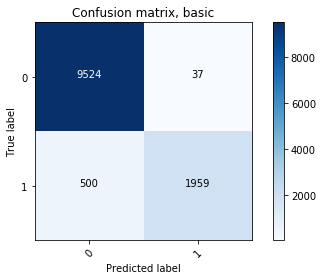

In [54]:
cm_final = confusion_matrix(y_test, y_pred_PCA)

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_final, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

In [77]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall_score = recall_score(y_test, y_pred_PCA, average='weighted')
precision_score = precision_score(y_test, y_pred_PCA, average='weighted')
average_precision = average_precision_score(y_test, y_pred_PCA)

print('Average recall score: {0:0.2f}'.format(
      recall_score))
print('Average precision score: {0:0.2f}'.format(
      precision_score))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average recall score: 0.96
Average precision score: 0.96
Average precision-recall score: 0.82


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

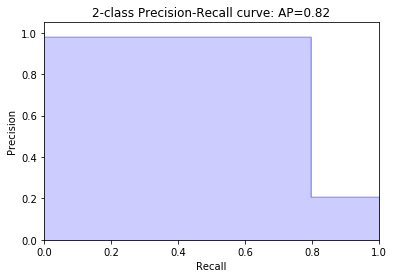

In [69]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_PCA)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

array([1. , 0.8])